In [175]:
import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from collections import Counter
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
stemmerl = LancasterStemmer()
stemmerp = PorterStemmer()
stemmers = SnowballStemmer('english')
stemmerwn = WordNetLemmatizer()

In [109]:
subs = ['wsb', 'science', 'ama', 'askreddit', 'worldnews', 'funny', 'dankmemes', 'memes', 'nosleep', 'psychology', 'politics', 'cscareerquestions', 'writingprompts']

# Load pickled files
data = {}
for i, c in enumerate(subs):
    with open("/home/nick/Documents/Reddit_NLP/pickles/" + c + ".pickle", "rb") as file:
        data[c] = pickle.load(file)

In [110]:
data.keys()
for key in data.keys():
    print(key + ': ' + str(len(data['{}'.format(key)])))

wsb: 36719
science: 59966
ama: 1885
askreddit: 101141
worldnews: 15265
funny: 6659
dankmemes: 4077
memes: 7332
nosleep: 6683
psychology: 1482
politics: 38821
cscareerquestions: 12703
writingprompts: 4026


In [ ]:
text = text.lower()
text = re.sub('\[.*?\]', '', text)
text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
text = re.sub('\w*\d\w*', '', text)
text = re.sub('[‘’“”…]', '', text)
text = re.sub('\n', ' ', text)

In [152]:
wsb_lemmatized = []
for sub in data:
    print(sub)
    for comment in data[sub]:
        pass
#         wsb_lemmatized.append(stemmers.stem(clean_text(comment)))
    
wsb_lemmatized

wsb
science
ama
askreddit
worldnews
funny
dankmemes
memes
nosleep
psychology
politics
cscareerquestions
writingprompts


[]

In [79]:
# Turn lists of comments into one big string
def combine_text(comments):
    combined_text = ' '.join(comments)
    return combined_text
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [80]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['text']
data_df = data_df.sort_index()
data_df

,text
ama,Tldr: do whatever the fuck you want. So you're telling me people on the internet LIE???? [removed] This is so funny this subreddit got fucked by o...
askreddit,"Victoria’s Secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed, but now it’s almost excl..."
cscareerquestions,"Hi there,\n\nI 've been looking for a stable job (freelancing rn) for the past year in a FAANG company and right now am feeling pretty down becaus..."
dankmemes,"Meme of the Month Seeding and Nominations for July 2020!\n\n# How do nominations work?\n\nTo nominate a meme, simply comment a name of a meme that..."
funny,"But I wanted the robot ferret. Haha! Suck it you fools, I already got my robotic ferret from a mod! This not funny!\nRule number...... Oh, I forge..."
memes,"RedditMC is opening staff positions: Builders, Helpers (To become mod), Devs, GameMasters...\n\nMore infos [here](https://www.reddit.com/r/RedditM..."
nosleep,It looks like there may be more to this story. Click [here](https://www.reddit.com/message/compose/?to=UpdateMeBot&subject=Subscribe&message=Subsc...
politics,WAIT HOLD THE FUCKING PHONE\n\nHe spent like 5 minutes claiming the democrats requesting 25billion for the post office was ridiculous earlier this...
psychology,"**\[Academic\] Decisions Regarding Mental Health Care (Canada, 17+)**\n\n**Study link**: [https://www.surveymonkey.ca/r/2VNC365](https://www.surve..."
science,"Kind of like how gamers go through RPG games, explore systematically. > The children were not motivated by achieving the maximum reward to the ext..."


In [159]:
# Clean text

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, remove newlines.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

clean = lambda x: clean_text(x)

# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.text.apply(clean))
data_clean

,text
ama,tldr do whatever the fuck you want so youre telling me people on the internet lie this is so funny this subreddit got fucked by one person a note...
askreddit,victorias secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed but now its almost exclusi...
cscareerquestions,hi there i ve been looking for a stable job freelancing rn for the past year in a faang company and right now am feeling pretty down because afte...
dankmemes,meme of the month seeding and nominations for july how do nominations work to nominate a meme simply comment a name of a meme that started or ...
funny,but i wanted the robot ferret haha suck it you fools i already got my robotic ferret from a mod this not funny rule number oh i forget carry on bu...
memes,redditmc is opening staff positions builders helpers to become mod devs gamemasters more infos using this to see if i have new flair cries in be...
nosleep,it looks like there may be more to this story click to get a reminder to check back later got issues click httpswwwredditcomrnosleepwikinosleepau...
politics,wait hold the fucking phone he spent like minutes claiming the democrats requesting for the post office was ridiculous earlier this briefing an...
psychology,decisions regarding mental health care canada study link you are invited to participate in a study named decisions regarding mental health ca...
science,kind of like how gamers go through rpg games explore systematically the children were not motivated by achieving the maximum reward to the extent...


To do.... 

Stemming, Lemmatization, ???

In [45]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
dtm_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dtm_cv.index = data_clean.index
dtm_cv

,aa,aaa,aaaaa,aaaaaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,...,𝘽𝙊𝘽,𝘽𝙐𝙄𝙇𝘿𝙀𝙍,𝘾𝘼𝙉,𝙁𝙄𝙓,𝙃𝙀,𝙄𝙏,𝙏𝙃𝙀,𝙔𝙀𝙎,𝚃𝚑𝚒𝚜,𝚝𝚎𝚖𝚙𝚕𝚊𝚝𝚎
ama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
askreddit,9,3,0,1,1,0,0,1,0,1,...,2,2,2,1,2,1,2,1,0,0
cscareerquestions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dankmemes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funny,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
memes,0,0,1,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,1,1
nosleep,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
politics,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
psychology,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
science,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
tf_idf = TfidfVectorizer(stop_words='english')
data_tf = tf_idf.fit_transform(data_clean.text)
dtm_idf = pd.DataFrame(data_tf.toarray(), columns=tf_idf.get_feature_names())
dtm_idf.index = data_clean.index
dtm_idf

,aa,aaa,aaaaa,aaaaaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,...,𝘽𝙊𝘽,𝘽𝙐𝙄𝙇𝘿𝙀𝙍,𝘾𝘼𝙉,𝙁𝙄𝙓,𝙃𝙀,𝙄𝙏,𝙏𝙃𝙀,𝙔𝙀𝙎,𝚃𝚑𝚒𝚜,𝚝𝚎𝚖𝚙𝚕𝚊𝚝𝚎
ama,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
askreddit,0.000393,0.000161,0.000000,0.000071,0.000061,0.000000,0.000000,0.000071,0.000000,0.000071,...,0.000141,0.000141,0.000141,0.000071,0.000141,0.000071,0.000141,0.000071,0.000000,0.000000
cscareerquestions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dankmemes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
funny,0.000000,0.000000,0.000000,0.000000,0.000000,0.001582,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
memes,0.000000,0.000000,0.001887,0.000000,0.000000,0.000000,0.000000,0.000000,0.015098,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001887,0.001887
nosleep,0.000520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
politics,0.000178,0.000219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
psychology,0.003284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
# Pickling document-term-matrices
dtm_cv.to_pickle("dtm_cv.pickle")
dtm_idf.to_pickle("dtm_idf.pickle")

# Pickling cleaned dataframe
data_clean.to_pickle('data_clean.pickle')
pickle.dump(cv, open("count_vectorizer.pickle", "wb"))
pickle.dump(cv, open("tf_idf.pickle", "wb"))

In [124]:
# Read in the document-term matrix

data_cv = pd.read_pickle('dtm_cv.pickle')
data_cv = data_cv.transpose()
data_cv.head()

,ama,askreddit,cscareerquestions,dankmemes,funny,memes,nosleep,politics,psychology,science,worldnews,wsb
aa,0,9,0,0,0,0,1,2,2,0,2,0
aaa,0,3,0,0,0,0,0,2,0,0,0,5
aaaaa,0,0,0,0,0,1,0,0,0,0,0,0
aaaaaaaa,0,1,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaaa,0,1,0,0,0,0,0,0,0,0,1,0


In [125]:
data_idf = pd.read_pickle('dtm_idf.pickle')
data_idf = data_idf.transpose()
data_idf.head()

,ama,askreddit,cscareerquestions,dankmemes,funny,memes,nosleep,politics,psychology,science,worldnews,wsb
aa,0.0,0.000393,0.0,0.0,0.0,0.000000,0.00052,0.000178,0.003284,0.0,0.000440,0.000000
aaa,0.0,0.000161,0.0,0.0,0.0,0.000000,0.00000,0.000219,0.000000,0.0,0.000000,0.000963
aaaaa,0.0,0.000000,0.0,0.0,0.0,0.001887,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
aaaaaaaa,0.0,0.000071,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
aaaaaaaaaaaa,0.0,0.000061,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000306,0.000000


In [126]:
# Find the top 30 words in each subreddit
top_dict_cv = {}
for c in data_cv.columns:
    top = data_cv[c].sort_values(ascending=False).head(30)
    top_dict_cv[c]= list(zip(top.index, top.values))

top_dict_cv

{'ama': [('im', 284),
  ('like', 232),
  ('did', 186),
  ('just', 171),
  ('dont', 170),
  ('think', 134),
  ('people', 130),
  ('time', 118),
  ('thats', 103),
  ('happy', 102),
  ('birthday', 101),
  ('ive', 94),
  ('know', 91),
  ('want', 80),
  ('good', 80),
  ('lol', 79),
  ('say', 79),
  ('really', 78),
  ('money', 72),
  ('years', 70),
  ('day', 70),
  ('thanks', 68),
  ('question', 66),
  ('youre', 63),
  ('thing', 59),
  ('lot', 59),
  ('feel', 59),
  ('got', 59),
  ('life', 58),
  ('make', 58)],
 'askreddit': [('just', 13207),
  ('like', 11966),
  ('im', 11328),
  ('dont', 8671),
  ('people', 8135),
  ('time', 7661),
  ('know', 5996),
  ('think', 5642),
  ('good', 5511),
  ('really', 5181),
  ('years', 4812),
  ('got', 4635),
  ('didnt', 4257),
  ('ive', 4239),
  ('make', 4201),
  ('thats', 3984),
  ('want', 3895),
  ('did', 3888),
  ('life', 3783),
  ('way', 3516),
  ('sex', 3515),
  ('day', 3407),
  ('feel', 3265),
  ('right', 3232),
  ('going', 3210),
  ('youre', 3165),
  

In [127]:
# Find the top 30 words in each subreddit
top_dict_idf = {}
for c in data_idf.columns:
    top = data_idf[c].sort_values(ascending=False).head(30)
    top_dict_idf[c]= list(zip(top.index, top.values))

top_dict_idf

{'ama': [('im', 0.35586750226974456),
  ('like', 0.2907086638259885),
  ('did', 0.23306815289497354),
  ('just', 0.21427233411312083),
  ('dont', 0.21301927952766397),
  ('think', 0.16790931445121748),
  ('people', 0.1628970961093901),
  ('birthday', 0.1597629443408928),
  ('time', 0.14786044108390795),
  ('thats', 0.12906462230205523),
  ('happy', 0.12781156771659838),
  ('ive', 0.11778713103294361),
  ('know', 0.11402796727657308),
  ('lol', 0.10691484491982474),
  ('good', 0.10024436683654776),
  ('want', 0.10024436683654776),
  ('say', 0.09899131225109091),
  ('really', 0.09773825766563406),
  ('alters', 0.09066341557488404),
  ('money', 0.09021993015289298),
  ('day', 0.08771382098197929),
  ('years', 0.08771382098197929),
  ('thanks', 0.0852077118110656),
  ('question', 0.0827016026401519),
  ('youre', 0.07894243888378136),
  ('feel', 0.07393022054195397),
  ('thing', 0.07393022054195397),
  ('got', 0.07393022054195397),
  ('lot', 0.07393022054195397),
  ('make', 0.07267716595649

In [128]:
# Print the top 15 words in each subreddit
for subreddit, top_words in top_dict_cv.items():
    print(subreddit)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

ama
im, like, did, just, dont, think, people, time, thats, happy, birthday, ive, know, want, good, lol, say, really, money, years, day, thanks, question, youre, thing, lot, feel, got, life, make
---
askreddit
just, like, im, dont, people, time, know, think, good, really, years, got, didnt, ive, make, thats, want, did, life, way, sex, day, feel, right, going, youre, things, say, better, said
---
cscareerquestions
work, just, like, dont, job, im, people, time, company, youre, think, know, good, really, want, companies, experience, make, lot, ive, years, working, thats, need, things, new, going, way, doing, jobs
---
dankmemes
just, like, dn, meme, im, dont, upvotes, investment, people, balance, thats, think, time, know, good, invested, right, profile, youre, new, sell, comment, fuck, returns, day, use, yes, make, did, catjam
---
funny
like, just, dont, im, god, know, people, think, thats, good, love, really, time, make, got, way, look, thought, ive, lol, did, right, youre, say, animals, t

In [129]:
# Print the top 15 words in each subreddit
for subreddit, top_words in top_dict_idf.items():
    print(subreddit)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

ama
im, like, did, just, dont, think, people, birthday, time, thats, happy, ive, know, lol, good, want, say, really, alters, money, day, years, thanks, question, youre, feel, thing, got, lot, make
---
askreddit
just, like, im, dont, people, time, know, think, good, really, years, got, didnt, ive, make, thats, want, did, life, way, sex, day, feel, right, going, youre, things, say, better, said
---
cscareerquestions
work, just, like, dont, job, im, people, time, company, youre, think, know, good, companies, really, want, leetcode, experience, cs, make, lot, ive, years, working, thats, software, need, code, things, new
---
dankmemes
dn, just, like, meme, catjam, investment, im, upvotes, dont, people, balance, dank, thats, think, returns, time, invested, breakeven, know, good, right, profile, youre, new, sell, gainloss, comment, investor, fuck, day
---
funny
like, just, dont, im, god, know, people, think, thats, good, rambutan, love, really, time, make, damu, rambutans, burger, cows, got, 

Significantly different results using CountVectorizer and TF-IDF for vectorization.

Pretty interesting how tipping /gratuity / restaurants are one of the top topics of r/science. I guess tipping is a hot subject amongst redditors. Also, autism appears in both searches. Autism appeared in two forms: autistic and autism. Maybe stemming will consolidate these. Let's try it!

In [172]:
words = []
for subreddit in data_cv.columns:
    top = [word for (word, count) in top_dict_cv[subreddit]]
    for t in top:
        words.append(t)

words

Counter(words).most_common()

[('im', 12),
 ('like', 12),
 ('just', 12),
 ('dont', 12),
 ('think', 12),
 ('people', 12),
 ('time', 12),
 ('thats', 12),
 ('good', 12),
 ('know', 11),
 ('make', 11),
 ('really', 10),
 ('youre', 10),
 ('way', 9),
 ('want', 7),
 ('right', 7),
 ('did', 6),
 ('ive', 6),
 ('say', 6),
 ('got', 6),
 ('going', 6),
 ('doesnt', 5),
 ('lol', 4),
 ('years', 4),
 ('day', 4),
 ('lot', 4),
 ('things', 4),
 ('need', 4),
 ('thing', 3),
 ('life', 3),
 ('work', 3),
 ('new', 3),
 ('fuck', 3),
 ('does', 3),
 ('money', 2),
 ('feel', 2),
 ('didnt', 2),
 ('said', 2),
 ('meme', 2),
 ('sell', 2),
 ('use', 2),
 ('yes', 2),
 ('sure', 2),
 ('man', 2),
 ('looks', 2),
 ('shit', 2),
 ('happy', 1),
 ('birthday', 1),
 ('thanks', 1),
 ('question', 1),
 ('sex', 1),
 ('better', 1),
 ('job', 1),
 ('company', 1),
 ('companies', 1),
 ('experience', 1),
 ('working', 1),
 ('doing', 1),
 ('jobs', 1),
 ('dn', 1),
 ('upvotes', 1),
 ('investment', 1),
 ('balance', 1),
 ('invested', 1),
 ('profile', 1),
 ('comment', 1),
 ('returns

In [134]:
# Most commonly used words and how many subreddits they appear in (we're looking at a total of 12 subreddits)
Counter(words).most_common()

[('im', 12),
 ('like', 12),
 ('just', 12),
 ('dont', 12),
 ('think', 12),
 ('time', 12),
 ('good', 12),
 ('people', 11),
 ('thats', 11),
 ('know', 11),
 ('really', 10),
 ('youre', 10),
 ('make', 10),
 ('way', 8),
 ('want', 6),
 ('got', 6),
 ('right', 6),
 ('did', 5),
 ('say', 5),
 ('ive', 4),
 ('lol', 4),
 ('day', 4),
 ('going', 4),
 ('things', 4),
 ('doesnt', 4),
 ('years', 3),
 ('lot', 3),
 ('work', 3),
 ('need', 3),
 ('new', 3),
 ('money', 2),
 ('feel', 2),
 ('thing', 2),
 ('didnt', 2),
 ('life', 2),
 ('meme', 2),
 ('sell', 2),
 ('fuck', 2),
 ('looks', 2),
 ('shit', 2),
 ('trump', 2),
 ('does', 2),
 ('birthday', 1),
 ('happy', 1),
 ('alters', 1),
 ('thanks', 1),
 ('question', 1),
 ('sex', 1),
 ('better', 1),
 ('said', 1),
 ('job', 1),
 ('company', 1),
 ('companies', 1),
 ('leetcode', 1),
 ('experience', 1),
 ('cs', 1),
 ('working', 1),
 ('software', 1),
 ('code', 1),
 ('dn', 1),
 ('catjam', 1),
 ('investment', 1),
 ('upvotes', 1),
 ('balance', 1),
 ('dank', 1),
 ('returns', 1),
 ('i

In [227]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['im',
 'like',
 'just',
 'dont',
 'think',
 'people',
 'time',
 'thats',
 'good',
 'know',
 'make',
 'really',
 'youre',
 'way',
 'want',
 'right',
 'did',
 'ive',
 'say',
 'got',
 'going',
 'doesnt']

In [228]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

pickle.dump(cv, open("cv_stop.pickle", "wb"))
data_stop.to_pickle("dtm_stop.pickle")

In [232]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=100, random_state=42)

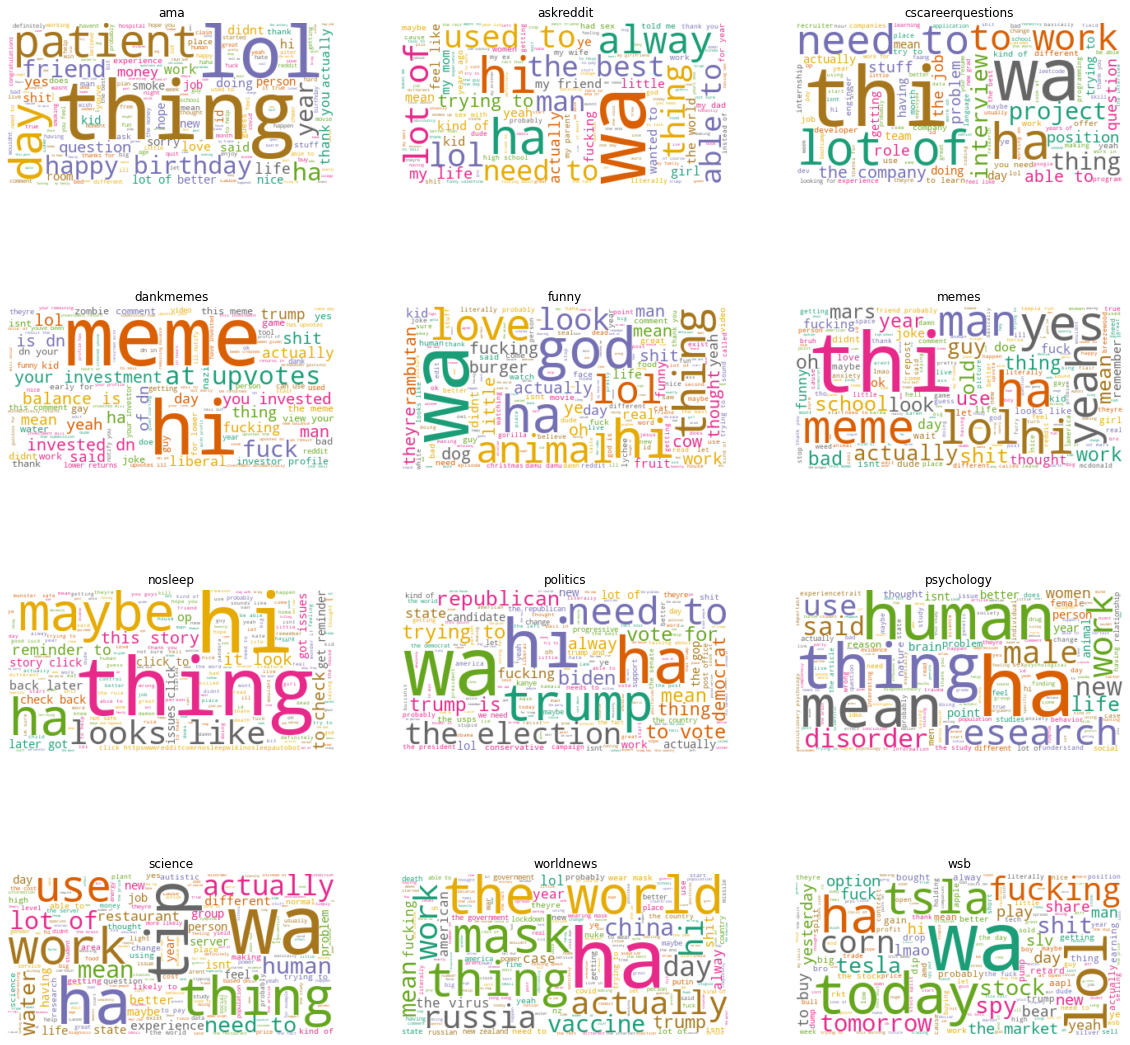

In [238]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]



for index, subreddit in enumerate(dtm_cv.columns):
    wc.generate(data_clean.text[subreddit])
    
    plt.subplot(4, 3, index + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(subreddit)

plt.show()

Oof, these look terrible. I'm following Alice's NLP tutorial and I like the succinct way she wrote a reusable piece of code to put all comments in a dictionary as values, with the subreddit name as the key, then turning each subreddit's list of comments into a single giant string. However, when I try to stem/lemmatize these huge strings after cleaning them, the computer reaches its recursive limit. So I may need to go back and enter each corpus in manually (as I do a bit further below), then clean and lemmatize before creating the large strings. 

That will allow me to lemmatize and stem - however, removing stop words is probably the best way to improve the word clouds. (Also, they already look stemmed --- hmm) It also looks like there are bi-grams in the word clouds, even though I never specified bi-grams. Does WordCloud do these things in-house?

In [195]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
dtm_cv = dtm_cv.transpose()
for sub in dtm_cv.columns:
    uniques = dtm_cv[sub].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(subs, unique_list)), columns=['subreddit', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_unique_sort

,subreddit,unique_words
1,science,54730
7,memes,31623
10,politics,21091
2,ama,20052
11,cscareerquestions,19380
9,psychology,18370
6,dankmemes,10870
4,worldnews,9956
5,funny,8110
8,nosleep,7410


r/science has the most unique words - no surprise there. But r/memes has the second highest words?? Now that is a surprise. Maybe they use lots of random, non-real words as a kind of 'baby talk' or altering normal words? 

It's interesting to me that wallstreetbets has the least unique words, because they have lots of lingo and there seems to be a variety of different comments on there. I guess the lingo can work against the unique word count, too - they keep using the same words over and over. 

Finally, note that nosleep is 3rd from last in the unique word count. That makes sense - I was thinking at first that this included post submissions (not just comments) and that the low unique word count reflects the cliched and overused writing (creepy stories). However, my analysis is just of comments, not of submissions. So the comments are even less unique - probably just repackaged versions of, 'wow, spooky story! i'm afraid to turn the lights off now' etc.

In [206]:
with open(f'/home/nick/Documents/Reddit_NLP/pickles/wsb.pickle', 'rb') as file:
    wsb = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/science.pickle', 'rb') as file:
    science = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/ama.pickle', 'rb') as file:
    ama = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/askreddit.pickle', 'rb') as file:
    askreddit = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/worldnews.pickle', 'rb') as file:
    worldnews = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/funny.pickle', 'rb') as file:
    funny = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/dankmemes.pickle', 'rb') as file:
    dankmemes = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/politics.pickle', 'rb') as file:
    politics = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/memes.pickle', 'rb') as file:
    memes = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/psychology.pickle', 'rb') as file:
    psychology = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/nosleep.pickle', 'rb') as file:
    nosleep = pickle.load(file)
with open('/home/nick/Documents/Reddit_NLP/pickles/cscareerquestions.pickle', 'rb') as file:
    cscareerquestions = pickle.load(file)

In [219]:
print('wsb: {}'.format(len(wsb)))
print('science: {}'.format(len(science)))
print('ama: {}'.format(len(ama)))
print('askreddit: {}'.format(len(askreddit)))    
print('worldnews: {}'.format(len(worldnews)))      
print('funny: {}'.format(len(funny)))      
print('dankmemes: {}'.format(len(dankmemes)))      
print('politics: {}'.format(len(politics)))      
print('psychology: {}'.format(len(psychology)))   
print('cscareerquestions: {}'.format(len(cscareerquestions)))   
print('nosleep: {}'.format(len(nosleep)))   
print('memes: {}'.format(len(memes)))   

wsb: 36719
science: 59966
ama: 1885
askreddit: 101141
worldnews: 15265
funny: 6659
dankmemes: 4077
politics: 38821
psychology: 1482
cscareerquestions: 12703
nosleep: 6683
memes: 7332


In [239]:
# Calculate the words per comment of each subreddit

# Find the total number of words that a subreddit uses
total_list = []
sub_name = []
for subreddit in dtm_cv.columns:
    totals = sum(dtm_cv[subreddit])
    sub_name.append(subreddit)
    total_list.append(totals)
    
data_words = pd.DataFrame(list(zip(dtm_cv.columns, total_list)), columns=['subreddit', 'total_words'])
data_total_sort = data_words.sort_values(by='total_words', ascending=False)
data_total_sort

,subreddit,total_words
1,askreddit,1160818
7,politics,534476
2,cscareerquestions,326522
11,wsb,243668
10,worldnews,227072
9,science,174897
6,nosleep,76217
4,funny,47841
5,memes,37814
8,psychology,32283


In [222]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
total_list

[18493,
 1160818,
 326522,
 25725,
 47841,
 37814,
 76217,
 534476,
 32283,
 174897,
 227072,
 243668]

In [240]:
num_dict = {'wsb': 36719, 'science': 59966, 'memes': 7332, 'cscareerquestions': 12703, 'politics': 38821, 'psychology': 1482, 'ama': 1885, 'dankmemes': 4077, 'worldnews': 15265, 'funny': 6659, 'nosleep': 6683, 'askreddit': 101141}
num_comments = [1885, 101141, 12703, 4077, 6659, 7332, 6683, 38821, 1482, 59966, 15265, 36719]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['num_comments'] = num_comments
data_words['words_per_comment'] = data_words['total_words'] / data_words['num_comments']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpc_sort = data_words.sort_values(by='words_per_comment', ascending=False)
data_wpc_sort

,subreddit,total_words,num_comments,words_per_comment
2,cscareerquestions,326522,12703,25.704322
8,psychology,32283,1482,21.783401
10,worldnews,227072,15265,14.875336
7,politics,534476,38821,13.767703
1,askreddit,1160818,101141,11.477225
6,nosleep,76217,6683,11.404609
0,ama,18493,1885,9.810610
4,funny,47841,6659,7.184412
11,wsb,243668,36719,6.636019
3,dankmemes,25725,4077,6.309787


CS career questions has the most words per comment on average, at 25.7. This makes sense, because people generally want to ask detailed questions and receive similarly detailed answers. Psychology has the next highest at 21, indicating lively discussion around topics. From there, words per comment drops to 14 for worldnews - people probably give relatively short replies based on their thoughts about current events. Politics at 13 is the same type of thing.

Ask reddit has 11 wpc, which makes sense based on the gist of the subreddit - a low effort, frontpage subreddit where people try to get karma, and likely give canned, generic answers in hope of getting some upvotes.

Nosleep has 11 wpc as well - as replies to fictional horror stories, this makes sense, with comments probably ranging from "good job!" to, "good job, I'll be scared to turn the lights off tonight".

AMA clocks in at 9 wpc, which also makes sense - the longer questions that span paragraphs average out with the likely large number of "lol" and other short answers.

Dankmemes has 6wpc which sounds just right - people responding to memes, but on dankmemes, so with a bit more of a personal touch - with memes coming in just below that at 5.

Finally, science has 2.9 words per comment, which seems odd at first, but makes total sense after I realized that it's probably picking up lots of " \[removed\] " comments, which really drives down the average. I have seen threads on r/science where the entire comment section is \[removed\] all the way down (with tons of nested \[removed\]s). It is a heavily moderated subreddit. I'll have to go back and skip \[removed\] and \[deleted\] comments.